<a href="https://colab.research.google.com/github/Akshata1992/Pytorch/blob/master/Pytorch_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#import required packages

import torch as t
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [43]:
#create dataset
X = t.linspace(1,50,50).reshape(-1,1)
print(X.shape)

torch.Size([50, 1])


In [44]:
#create noise to add to the equation
e = t.randint(-8,9,(50,1),dtype=t.float)
print(e.sum())

tensor(0.)


In [45]:
#create y data
Y = 2*X + 1 + e
print(Y.shape)

torch.Size([50, 1])


Text(0.5, 0, 'x')

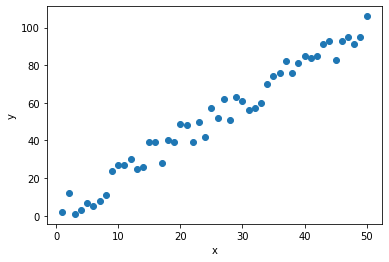

In [46]:
#convert X and Y values to plot the values

plt.scatter(X.numpy(),Y.numpy())
plt.ylabel('y')
plt.xlabel('x')

In [51]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [52]:
# send dimention to the model
t.manual_seed(59)
model = Model(1,1)
print("Weights: ",model.linear.weight.item())
print("Bias: ",model.linear.bias.item())

Weights:  0.10597813129425049
Bias:  0.9637961387634277


In [53]:
#define loss function

critetion = nn.MSELoss()

#define optimizer

optimizer = t.optim.SGD(model.parameters(),lr = 0.001)

In [55]:
epochs = 50
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X)
    loss = critetion(y_pred, Y)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: {model.linear.weight.item():10.8f}  \
bias: {model.linear.bias.item():10.8f}') 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 3123.72631836  weight: 0.10597813  bias: 0.96379614
epoch:  2  loss: 1625.29858398  weight: 3.36746049  bias: 1.06046367
epoch:  3  loss: 851.71337891  weight: 1.02404678  bias: 0.99060225
epoch:  4  loss: 452.33831787  weight: 2.70783782  bias: 1.04039466
epoch:  5  loss: 246.15515137  weight: 1.49802029  bias: 1.00421417
epoch:  6  loss: 139.71025085  weight: 2.36730456  bias: 1.02980673
epoch:  7  loss: 84.75653076  weight: 1.74272239  bias: 1.01101458
epoch:  8  loss: 56.38589478  weight: 2.19150639  bias: 1.02411366
epoch:  9  loss: 41.73908615  weight: 1.86906004  bias: 1.01429856
epoch: 10  loss: 34.17742538  weight: 2.10075474  bias: 1.02094793
epoch: 11  loss: 30.27358437  weight: 1.93429041  bias: 1.01576757
epoch: 12  loss: 28.25813675  weight: 2.05390954  bias: 1.01908720
epoch: 13  loss: 27.21761322  weight: 1.96797335  bias: 1.01629961
epoch: 14  loss: 26.68041039  weight: 2.02973199  bias: 1.01790035
epoch: 15  loss: 26.40302658  weight: 1.98536932  bias

Text(0, 0.5, 'Losses')

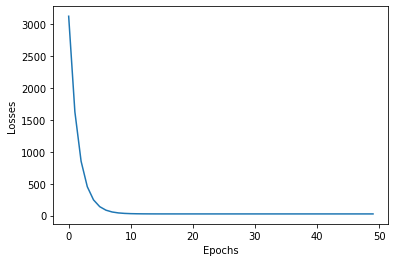

In [56]:
plt.plot(range(epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('Losses')

In [57]:
w1,b1 = model.linear.weight.item(),model.linear.bias.item()
x1 = np.array([X.min(), X.max()])

y1 = w1 * x1 + b1

Text(0, 0.5, 'y')

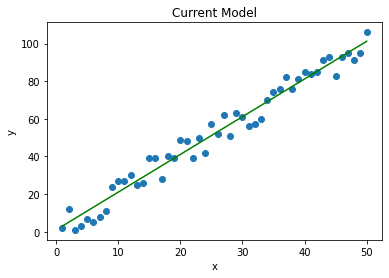

In [61]:
plt.scatter(X.numpy(), Y.numpy())
plt.plot(x1,y1,'g')
plt.title("Current Model")
plt.xlabel('x')
plt.ylabel('y')